## Prerequisites

In [2]:
import numpy as np
import keras

Using TensorFlow backend.
/usr/local/var/pyenv/versions/anaconda3-4.4.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Load Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


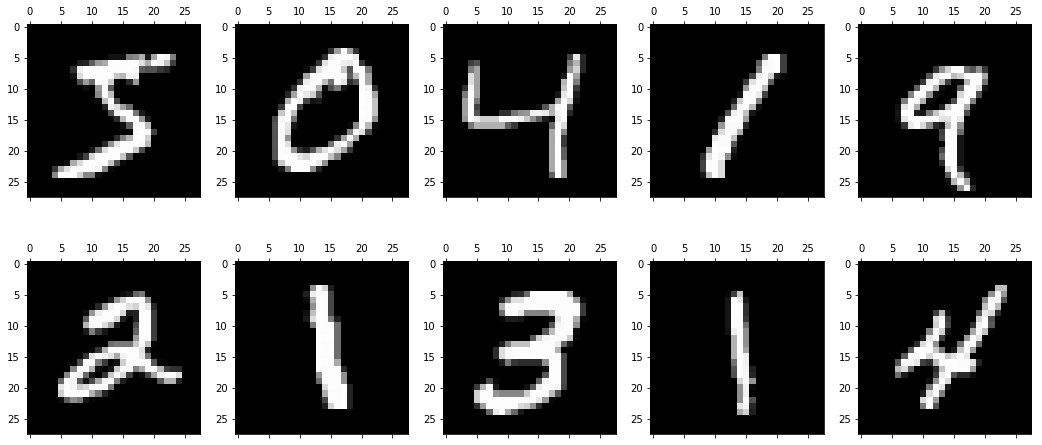

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [5]:
# Dimension 기준
# X = number of data / input height / input width / input channel
# W = ouput channel/ input channel / weight height / weight width
# Y = number of data / output height / output width / output channel

X_train = X_train.reshape(60000, 28, 28, 1) 
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## Build a Model

### Convolutional Neural Network

In [11]:
# Write your code here!
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters = 6, 
                 kernel_initializer = 'random_uniform',
                 activation = 'sigmoid',
                 kernel_size = (5, 5),
                 input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))

model.add(Conv2D(filters = 12, 
                 kernel_initializer = 'random_uniform',
                 activation = 'sigmoid',
                 kernel_size = (5, 5)))
model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2))) # strides : 한칸씩 가는 스텝

model.add(Flatten())

model.add(Dense(units=128,
               kernel_initializer = 'random_uniform',
               activation='sigmoid'))

model.add(Dense(units=10,
               kernel_initializer = 'random_uniform',
               activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer = 'sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(X_train,
         y_train_hot,
         epochs=30,
         validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 303us/step - loss: 2.3017 - acc: 0.1112 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 18s 298us/step - loss: 2.3014 - acc: 0.1122 - val_loss: 2.3006 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 18s 298us/step - loss: 2.3012 - acc: 0.1122 - val_loss: 2.3006 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 18s 292us/step - loss: 2.3009 - acc: 0.1125 - val_loss: 2.3004 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 17s 275us/step - loss: 2.3006 - acc: 0.1124 - val_loss: 2.3004 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 17s 275us/step - loss: 2.2999 - acc: 0.1130 - val_loss: 2.3003 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================] - 17s 275us/step - loss: 2.2991 - acc: 0.1144 - val_loss: 2.